# Study the condition for the Hohnenberg-Kohn Mapping in a 1nn (2nn) Transverse Ising model

## Case a) 1nn Transverse Ising Model

The Hamiltonian is 

$H=J\sum_i x_i x_{i+1} + \sum_i h_i z_i   \; \; \text{with}  \; \; J<0 \; \; \text{and}  \; \; h_i \in [0,h_{max}]$

We have to check if the $\det{M_{ij}}\ne 0$ with $M_{ij}=\langle z_i z_j \rangle - \langle z_i \rangle \langle z_j \rangle$ for each realization of the Disorder

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils_sparse_diag import transverse_ising_sparse_h_k_mapping_check,transverse_ising_sparse_h_k_mapping_check_lanczos_method
import os

#limit the usage of cpu by quspin
os.environ[
    "KMP_DUPLICATE_LIB_OK"
] = "True"  # uncomment this line if omp error occurs on OSX for python 3
os.environ["OMP_NUM_THREADS"] = str(
    3
)  # set number of OpenMP threads to run in parallel
os.environ["MKL_NUM_THREADS"] = str(3)  # set number of MKL threads to run in parallel

#### Data

In [2]:



h_max=np.linspace(0,2*np.e,11)
ndata=500
l=8
j=-1

zs={}
zzs={}
for h in h_max:
    hs=np.random.uniform(0.,h,(ndata,l))
    z,zz=transverse_ising_sparse_h_k_mapping_check(h_max=h,hs=hs,n_dataset=ndata,l=l,j1=j,j2=j,pbc=True,z_2=False,file_name='none',check_2nn=False,eps_breaking=0.)
    print(zz.shape)
    zs[h]=z
    zzs[h]=zz

100%|██████████| 500/500 [00:07<00:00, 63.78it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:08<00:00, 55.93it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 51.91it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 52.81it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 53.24it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:08<00:00, 55.56it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 54.21it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:08<00:00, 57.96it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:08<00:00, 56.99it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 50.71it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 50.56it/s]

(500, 8, 8)


#### Analysis of the eigenvalues of $M_{ij}$

In [3]:
m=[]
min_eigh=[]
av_eigh=[]
pb_low=[]
for h in h_max:
    mij=zzs[h]-zs[h][:,None,:]*zs[h][:,:,None]
    lambd,_=np.linalg.eig(mij)
    av_eigh.append(np.average(np.min(lambd,axis=-1)))
    lambd=np.min(lambd,axis=-1)
    pr=lambd[lambd<0.1].shape[0]
    print(pr)
    pb_low.append(pr/ndata)
    m.append(mij)
    min_eigh.append(np.min(lambd))

0
0
0
0
46
215
349
436
470
487
495


#### Plot

/opt/anaconda3/envs/dft_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


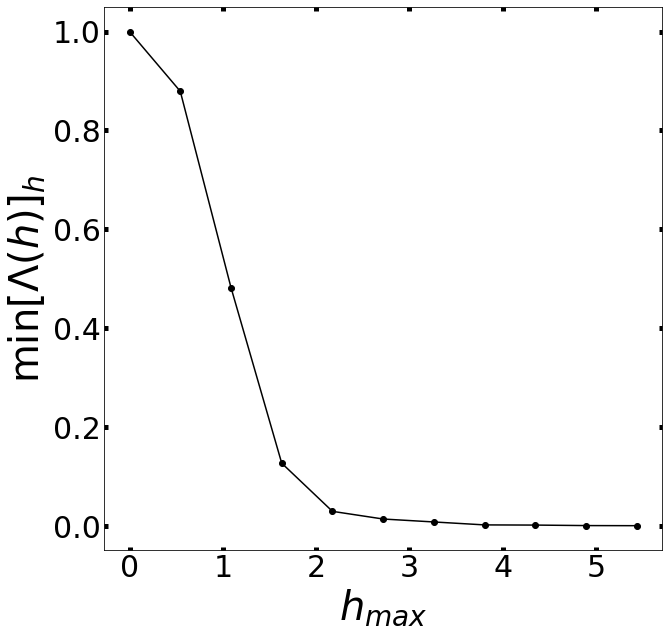

/opt/anaconda3/envs/dft_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


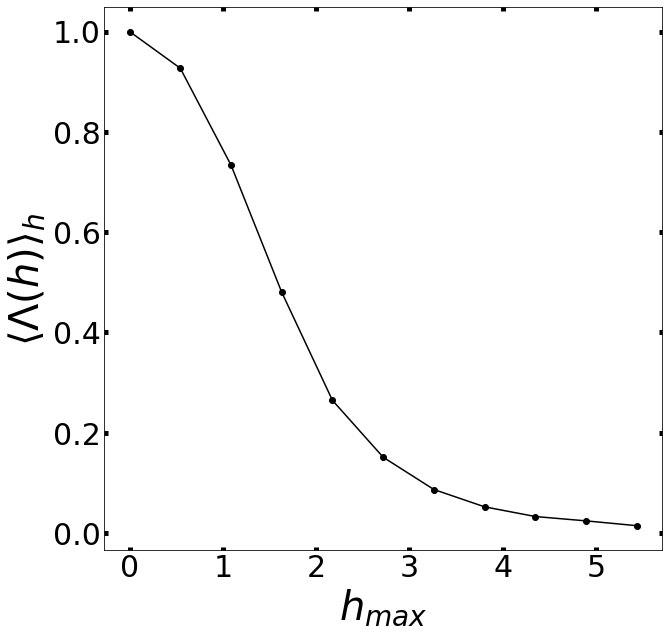

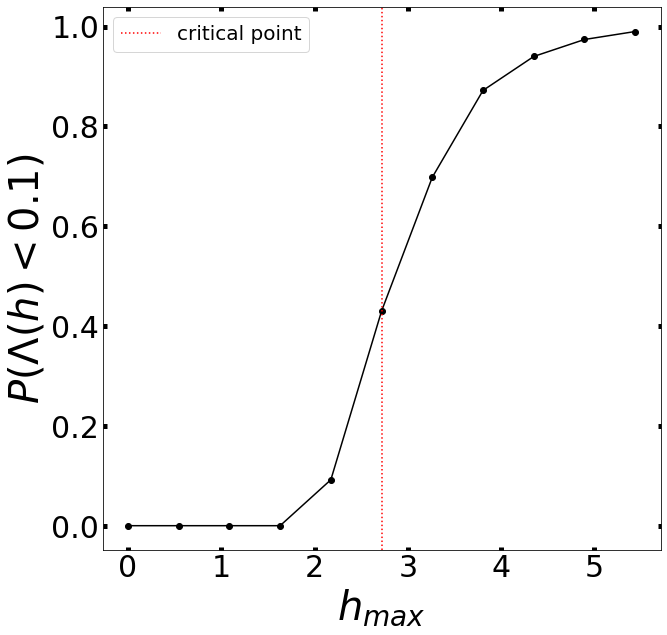

In [11]:
plt.figure(figsize=(10,10))
plt.plot(h_max,min_eigh,color='black',marker='o')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$\min[ \Lambda(h)]_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.show()
plt.figure(figsize=(10,10))
plt.plot(h_max,av_eigh,color='black',marker='o')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$\langle \Lambda(h)\rangle_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.show()
plt.figure(figsize=(10,10))
plt.plot(h_max,pb_low,marker='o',color='black')
plt.axvline(x=np.e,color='red',linestyle=':',label='critical point')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$P( \Lambda(h)<0.1)$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.legend(fontsize=20)
plt.show()

## Case b) 2nn Scenarion

The Hamiltonian is 

$ H=J \sum_i (x_i x_{i+1}+ x_i x_{i+2} )+\sum_i h_i z_i \; \; \text{with} \; \; J<0 $

#### Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils_sparse_diag import transverse_ising_sparse_h_k_mapping_check,transverse_ising_sparse_h_k_mapping_check_lanczos_method
import os

#limit the usage of cpu by quspin
os.environ[
    "KMP_DUPLICATE_LIB_OK"
] = "True"  # uncomment this line if omp error occurs on OSX for python 3
os.environ["OMP_NUM_THREADS"] = str(
    3
)  # set number of OpenMP threads to run in parallel
os.environ["MKL_NUM_THREADS"] = str(3)  # set number of MKL threads to run in parallel

#### Data

In [13]:
h_max=np.linspace(0,4*np.e,11)
ndata=500
l=8
j=-1

zs={}
zzs={}
for h in h_max:
    hs=np.random.uniform(0.,h,(ndata,l))
    z,zz=transverse_ising_sparse_h_k_mapping_check(h_max=h,hs=hs,n_dataset=ndata,l=l,j1=j,j2=j,pbc=True,z_2=False,file_name='none',check_2nn=True,eps_breaking=0.)
    print(zz.shape)
    zs[h]=z
    zzs[h]=zz

100%|██████████| 500/500 [00:08<00:00, 57.22it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 48.99it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:09<00:00, 50.32it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 47.41it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:11<00:00, 44.76it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 46.21it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 46.38it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 45.63it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 47.68it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 46.75it/s]


(500, 8, 8)


100%|██████████| 500/500 [00:10<00:00, 46.30it/s]

(500, 8, 8)


#### Analysis of the eigenvalues of $M_{ij}$

In [14]:
m=[]
min_eigh=[]
av_eigh=[]
pb_low=[]
for h in h_max:
    mij=zzs[h]-zs[h][:,None,:]*zs[h][:,:,None]
    lambd,_=np.linalg.eig(mij)
    av_eigh.append(np.average(np.min(lambd,axis=-1)))
    lambd=np.min(lambd,axis=-1)
    pr=lambd[lambd<0.1].shape[0]
    print(pr)
    pb_low.append(pr/ndata)
    m.append(mij)
    min_eigh.append(np.min(lambd))

0
0
0
0
0
34
186
320
408
457
482


#### Plot

/opt/anaconda3/envs/dft_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


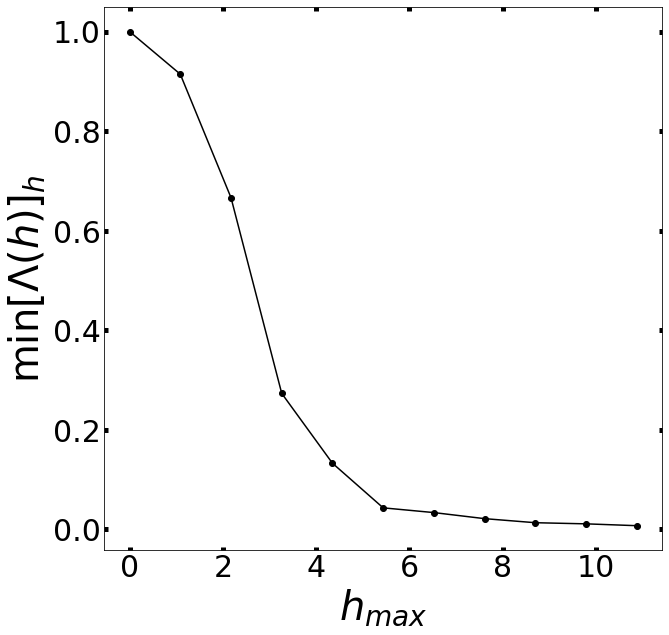

/opt/anaconda3/envs/dft_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


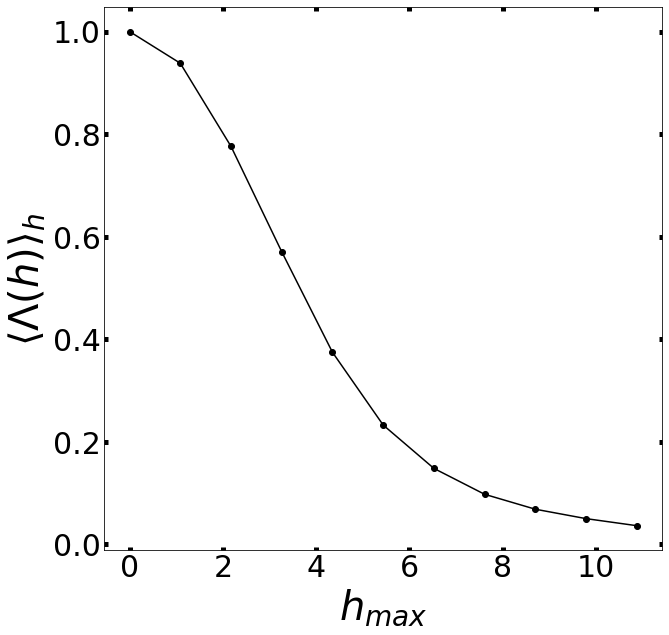

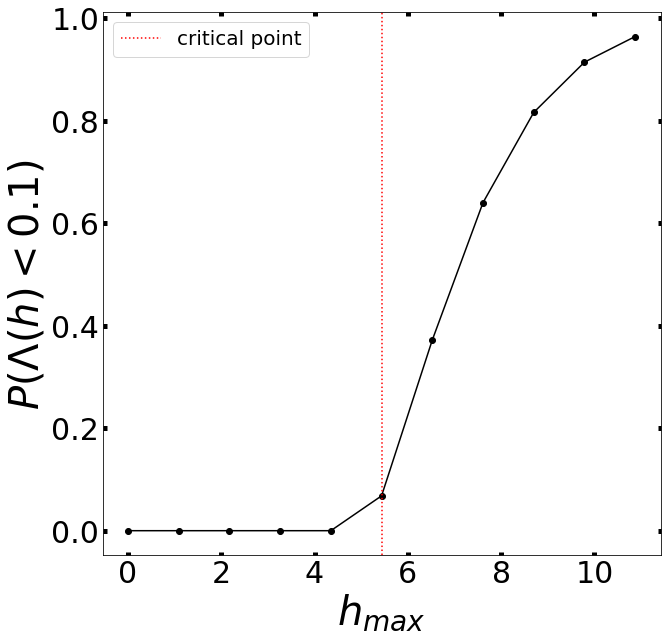

In [15]:
plt.figure(figsize=(10,10))
plt.plot(h_max,min_eigh,color='black',marker='o')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$\min[ \Lambda(h)]_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.show()
plt.figure(figsize=(10,10))
plt.plot(h_max,av_eigh,color='black',marker='o')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$\langle \Lambda(h)\rangle_{h}$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.show()
plt.figure(figsize=(10,10))
plt.plot(h_max,pb_low,marker='o',color='black')
plt.axvline(x=2*np.e,color='red',linestyle=':',label='critical point')
plt.xlabel(r'$h_{max}$',fontsize=40)
plt.ylabel(r'$P( \Lambda(h)<0.1)$',fontsize=40)
plt.tick_params(
            top=True,
            right=True,
            labeltop=False,
            labelright=False,
            direction="in",
            labelsize=30,
            width=5,
        )
plt.legend(fontsize=20)
plt.show()